In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/linear-regression/Linear Regression.xlsx


In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_excel('/kaggle/input/linear-regression/Linear Regression.xlsx',header = None)
df.head(10)

,0,1,2
0,NaN,NaN,NaN
1,NaN,Age,# Absence Hours
2,NaN,32,36.6
3,NaN,40.3,30.2
4,NaN,48.8,83.8
5,NaN,44.6,70
6,NaN,35.7,0
7,NaN,48.4,81.8
8,NaN,50.8,60.5
9,NaN,36.2,30.1


In [4]:
df.columns = ['column1', 'Age', '#Absence Hours']
df.head(10)

,column1,Age,#Absence Hours
0,NaN,NaN,NaN
1,NaN,Age,# Absence Hours
2,NaN,32,36.6
3,NaN,40.3,30.2
4,NaN,48.8,83.8
5,NaN,44.6,70
6,NaN,35.7,0
7,NaN,48.4,81.8
8,NaN,50.8,60.5
9,NaN,36.2,30.1


In [5]:
df.drop(columns=['column1'],axis=1, inplace = True)
df.head(10)

,Age,#Absence Hours
0,NaN,NaN
1,Age,# Absence Hours
2,32,36.6
3,40.3,30.2
4,48.8,83.8
5,44.6,70
6,35.7,0
7,48.4,81.8
8,50.8,60.5
9,36.2,30.1


In [6]:
df.drop([0, 1], inplace = True)
df.head(10)

,Age,#Absence Hours
2,32,36.6
3,40.3,30.2
4,48.8,83.8
5,44.6,70
6,35.7,0
7,48.4,81.8
8,50.8,60.5
9,36.2,30.1
10,58.4,181.6
11,39.9,30.7


In [7]:
df.shape

(501, 2)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 2 to 502
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             501 non-null    object
 1   #Absence Hours  501 non-null    object
dtypes: object(2)
memory usage: 8.0+ KB


In [9]:
#df['#Absence Hours'] = df['#Absence Hours'].astype(float)
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['#Absence Hours'] = pd.to_numeric(df['#Absence Hours'], errors='coerce')
df.head(10)

,Age,#Absence Hours
2,32.0,36.6
3,40.3,30.2
4,48.8,83.8
5,44.6,70.0
6,35.7,0.0
7,48.4,81.8
8,50.8,60.5
9,36.2,30.1
10,58.4,181.6
11,39.9,30.7


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 2 to 502
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             501 non-null    float64
 1   #Absence Hours  501 non-null    float64
dtypes: float64(2)
memory usage: 8.0 KB


In [11]:
print(df.isnull().sum())

Age               0
#Absence Hours    0
dtype: int64


In [12]:
df['Age'].unique()

array([32. , 40.3, 48.8, 44.6, 35.7, 48.4, 50.8, 36.2, 58.4, 39.9, 46.5,
       15. , 37.7, 30.8, 49.9, 42.8, 48.6, 41.9, 51. , 36.9, 57.9, 24.5,
       49.5, 60.6, 35.8, 35.9, 35.5, 40. , 49.8, 38.1, 42.9, 77. , 23.7,
       51.6, 40.4, 52.4, 20. , 67.1, 41.3, 62.1, 28.1, 50.1, 33.8, 38.7,
       30.3, 43.7, 50. , 34.7, 29.3, 42.6, 54. , 43.9, 55.8, 31.2, 43.3,
       35.6, 39.3, 22.5, 39.7, 46.9, 44.1, 52.8, 42.4, 41. , 46.8, 45.3,
       38.3, 41.7, 43.5, 46.2, 47.7, 52. , 33.4, 47.6, 37.2, 45.5, 26.9,
       40.5, 52.2, 37.9, 29.4, 51.2, 39.5, 26.7, 39.2, 49. , 44. , 29.7,
       46.1, 27.9, 37.4, 50.4, 46.6, 50.3, 39. , 37.5, 47.5, 50.2, 33.2,
       32.8, 58.6, 23.9, 43.2, 52.6, 45.8, 37.8, 24.4, 45.9, 32.6, 39.4,
       49.7, 54.7, 36.5, 56.6, 43.1, 61.4, 47.9, 38. , 49.1, 55.9, 27.4,
       51.9, 66.1, 57.4, 31.4, 52.1, 30.6, 54.6, 30. , 42.5, 49.3, 38.2,
       45.6, 44.2, 42.3, 45. , 34.3, 35.4, 53.6, 19.2, 46.7, 59. , 36. ,
       51.4, 52.7, 51.8, 35.1, 53. , 40.9, 19. , 53

In [13]:
df.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
Age,501.0,43.426747,9.934508,11.8,37.3,43.7,50.0,77.0
#Absence Hours,501.0,59.755489,48.678552,0.0,19.6,55.6,93.4,223.8


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

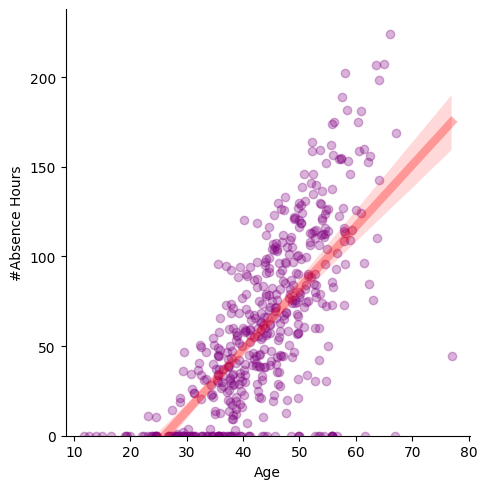

In [15]:
# Create the FacetGrid
g = sns.FacetGrid(data=df, height=5)

# Map the regplot to the FacetGrid
g.map(sns.regplot,'Age','#Absence Hours', scatter_kws = {'color': 'purple', 'alpha': 0.3}, line_kws = {'color': 'red', 'alpha': 0.3, 'lw':6})

# Set the y-axis limits
g.set(ylim=(0, None))

plt.show()

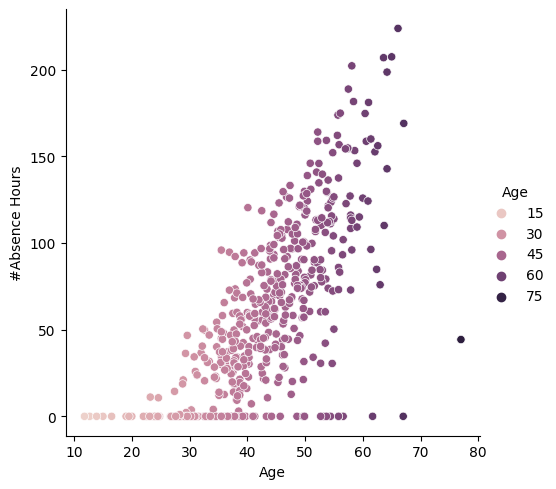

In [16]:
sns.relplot( data=df,x="Age", y="#Absence Hours", hue="Age")

In [17]:
# Calculate the correlation coefficient
correlation = df['Age'].corr(df['#Absence Hours'])

# Print the correlation coefficient
print("Correlation Coefficient:", correlation)

Correlation Coefficient: 0.7000986364828423


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming your DataFrame is named 'df' with columns 'Age' and '#Absence Hours'

# Split the data into features (X) and target variable (y)
X = df[['Age']]  # Features
y = df['#Absence Hours']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R-squared:', r2)


Mean Squared Error: 1279.9013542264818
R-squared: 0.31357835440256165


In [19]:
# Fit the model to the data
model.fit(df[['Age']], df['#Absence Hours'])

# Extract the slope
slope = model.coef_[0]

print("Estimated increase in absence hours per year:", slope)

Estimated increase in absence hours per year: 3.430445544234274


In [20]:
#df = df[df['#Absence Hours'] != 0]
#df.head(10)

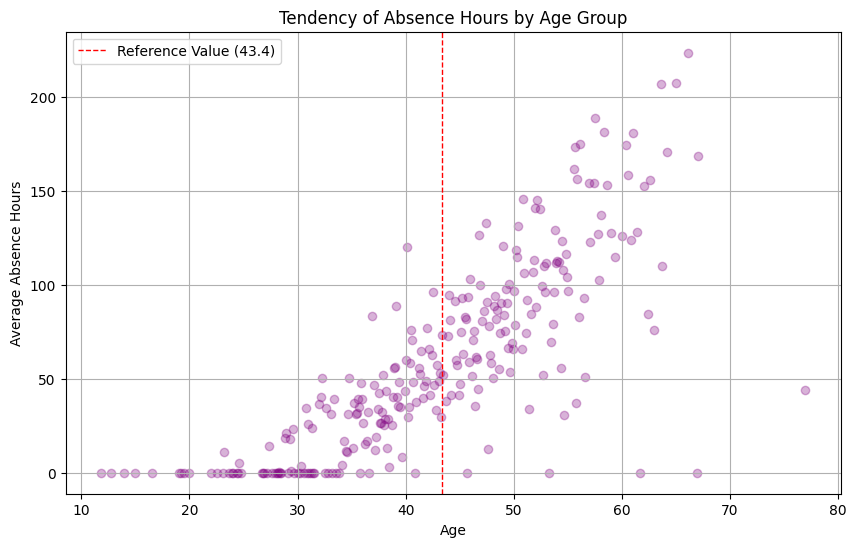

In [33]:
# Group by age and calculate mean absence hours
df_grouped = df.groupby('Age')['#Absence Hours'].mean()

# Line plot to visualize tendency
plt.figure(figsize=(10, 6))
plt.scatter(df_grouped.index, df_grouped.values, color='purple', alpha=0.3)
plt.xlabel('Age')
plt.ylabel('Average Absence Hours')
plt.title('Tendency of Absence Hours by Age Group')
plt.grid(True)

# Add vertical line at 43.4 (adjust x-axis limits if necessary)
plt.axvline(x=43.4, color='red', linestyle='dashed', linewidth=1, label='Reference Value (43.4)')


# Add legend for clarity (optional)
plt.legend()


plt.show()